<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Code Library, Styling, and Links</h1>
<details><summary style='color:#37c9e1; font-family:Orbitron;'>Github</summary><br/>

The current notebook
    
&#x1F4D8; &nbsp; [Python Version](https://github.com/OlgaBelitskaya/kaggle_notebooks/blob/master/passnyc-neural-networks-2.ipynb)

The previous notebook
    
&#x1F4D8; &nbsp; [Python Version](https://github.com/OlgaBelitskaya/kaggle_notebooks/blob/master/passnyc-neural-networks.ipynb)

<details><summary style='color:#37c9e1; font-family:Orbitron;'>Useful Links</summary><br/>

&#x1F4E1; &nbsp; [School Quality Reports. Educator Guide](http://schools.nyc.gov/NR/rdonlyres/967E0EE1-7E5D-4E47-BC21-573FEEE23AE2/0/201516EducatorGuideHS9252017.pdf)
    
&#x1F4E1; &nbsp; [New York City Department of Education](https://www.schools.nyc.gov)

&#x1F4E1; &nbsp; [NYC OpenData](https://opendata.cityofnewyork.us/)

&#x1F4E1; &nbsp; [Pandas Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)
    
&#x1F4E1; &nbsp; [Pandas Styling](https://pandas.pydata.org/pandas-docs/stable/style.html)

&#x1F4E1; &nbsp; [ggplot2](https://ggplot2.tidyverse.org/)

&#x1F4E1; &nbsp; [R Tutorial](https://www.tutorialspoint.com/r/index.htm)

In [1]:
%%html
<style> 
@import url('https://fonts.googleapis.com/css?family=Orbitron|Roboto&effect=3d');
body {background-color: gainsboro;} 
h3 {color:#818286; font-family:Roboto;}
span {color:black; text-shadow:4px 4px 4px #aaa;}
div.output_prompt,div.output_area pre {color:slategray;}
div.input_prompt,div.output_subarea {color:#37c9e1;}      
div.output_stderr pre {background-color:gainsboro;}  
div.output_stderr {background-color:slategrey;}                
</style>

In [2]:
import numpy as np,pandas as pd
import pylab as plt,tensorflow as tf
import matplotlib.colors as mcolors
from descartes import PolygonPatch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing \
import RobustScaler,OneHotEncoder
from sklearn.metrics import median_absolute_error,\
mean_absolute_error,r2_score,\
mean_squared_error,explained_variance_score
from keras.models import Sequential
import keras.layers as tkl
import keras.callbacks as tkc
cmap=plt.cm.get_cmap('Spectral',4)
spectral_cmap=[]
for i in range(cmap.N):
    rgb=cmap(i)[:3]
    spectral_cmap.append(mcolors.rgb2hex(rgb))
plt.style.use('seaborn-whitegrid')
path='../input/data-science-for-good/'
fw='weights.passnyc.hdf5'

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
def scores(regressor,y_train,y_valid,y_test,
           y_train_reg,y_valid_reg,y_test_reg):
    print(20*"<=>"); print(regressor); print(20*"<=>")
    print("EV score. Train: ",
          explained_variance_score(y_train,y_train_reg))
    print("EV score. Valid: ",
          explained_variance_score(y_valid,y_valid_reg))
    print("EV score. Test: ",
          explained_variance_score(y_test,y_test_reg))
    print(20*"<=>")
    print("R2 score. Train: ",r2_score(y_train,y_train_reg))
    print("R2 score. Valid: ",r2_score(y_valid,y_valid_reg))
    print("R2 score. Test: ",r2_score(y_test,y_test_reg))
    print(20*"<=>")
    print("MSE score. Train: ",
          mean_squared_error(y_train,y_train_reg))
    print("MSE score. Valid: ",
          mean_squared_error(y_valid,y_valid_reg))
    print("MSE score. Test: ",
          mean_squared_error(y_test,y_test_reg))
    print(20*"<=>")
    print("MAE score. Train: ",
          mean_absolute_error(y_train,y_train_reg))
    print("MAE score. Valid: ",
          mean_absolute_error(y_valid,y_valid_reg))
    print("MAE score. Test: ",
          mean_absolute_error(y_test,y_test_reg))
    print(20*"<=>")
    print("MdAE score. Train: ",
          median_absolute_error(y_train,y_train_reg))
    print("MdAE score. Valid: ",
          median_absolute_error(y_valid,y_valid_reg))
    print("MdAE score. Test: ",
          median_absolute_error(y_test,y_test_reg))
def history_plot(fit_history,n):
    keys=list(fit_history.history.keys())[0:4]
    plt.figure(figsize=(11,10)); plt.subplot(211)
    plt.plot(fit_history.history[keys[0]][n:],
             color='slategray',label='train')
    plt.plot(fit_history.history[keys[2]][n:],
             color='#37c9e1',label='valid')
    plt.xlabel("Epochs"); plt.ylabel("Loss")
    plt.legend(); plt.title('Loss Function')    
    plt.subplot(212)
    plt.plot(fit_history.history[keys[1]][n:],
             color='slategray',label='train')
    plt.plot(fit_history.history[keys[3]][n:],
             color='#37c9e1',label='valid')
    plt.xlabel("Epochs"); plt.ylabel("MAE"); plt.legend()
    plt.title('Mean Absolute Error'); plt.show()

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Data Loading and Preprocessing</h1>

In [4]:
school_explorer=pd.read_csv(path+'2016 School Explorer.csv')
d5_shsat=pd.read_csv(path+'D5 SHSAT Registrations and Testers.csv')
school_explorer.shape,d5_shsat.shape

((1272, 161), (140, 7))

In [5]:
drop_list=['Adjusted Grade','New?','Other Location Code in LCGMS']
school_explorer=school_explorer.drop(drop_list,axis=1)
school_explorer.loc[[427,1023,712,908],'School Name']=\
['P.S. 212 D12','P.S. 212 D30','P.S. 253 D21','P.S. 253 D27']
school_explorer['School Income Estimate']=\
school_explorer['School Income Estimate'].astype('object') 
for s in [",","$"," "]:
    school_explorer['School Income Estimate']=\
    school_explorer['School Income Estimate'].str.replace(s,"")
school_explorer['School Income Estimate']=\
school_explorer['School Income Estimate'].str.replace("nan","0")
school_explorer['School Income Estimate']=\
school_explorer['School Income Estimate'].astype(float)
school_explorer['School Income Estimate'].replace(0,np.NaN,inplace=True)
percent_list=['Percent ELL','Percent Asian','Percent Black',
              'Percent Hispanic','Percent Black / Hispanic',
              'Percent White','Student Attendance Rate',
              'Percent of Students Chronically Absent',
              'Rigorous Instruction %','Collaborative Teachers %',
              'Supportive Environment %','Effective School Leadership %',
              'Strong Family-Community Ties %','Trust %']
target_list=['Average ELA Proficiency','Average Math Proficiency']
economic_list=['Economic Need Index','School Income Estimate']
rating_list=['Rigorous Instruction Rating','Collaborative Teachers Rating',
             'Supportive Environment Rating','Effective School Leadership Rating',
             'Strong Family-Community Ties Rating','Trust Rating',
             'Student Achievement Rating']
for el in percent_list:
    school_explorer[el]=school_explorer[el].astype('object')
    school_explorer[el]=school_explorer[el].str.replace("%","")
    school_explorer[el]=school_explorer[el].str.replace("nan","0")
    school_explorer[el]=school_explorer[el].astype(float)
    school_explorer[el].replace(0,np.NaN,inplace=True)
    school_explorer[el]=school_explorer[el].interpolate()
for el in target_list+economic_list:
    school_explorer[el]=school_explorer[el].interpolate()
for el in rating_list:
    moda_value=school_explorer[el].value_counts().idxmax()
    school_explorer[el]=school_explorer[el].fillna(moda_value)    
category_list=['District','Community School?','City','Grades']               
for feature in category_list:
    feature_cat=pd.factorize(school_explorer[feature])
    school_explorer[feature]=feature_cat[0]    
for feature in rating_list:
    feature_pairs=dict(zip(['Not Meeting Target','Meeting Target', 
                            'Approaching Target','Exceeding Target'],
                            ['0','2','1','3']))
    school_explorer[feature].replace(feature_pairs,inplace=True)
    school_explorer[feature]=school_explorer[feature].astype(int)    
category_list=list(category_list+rating_list)
numeric_list=list(school_explorer\
.columns[[4,5]+list(range(13,24))+[25,27,29,31,33]+list(range(38,158))])    
print('Number of Missing Values: ',sum(school_explorer.isna().sum())) 

Number of Missing Values:  0


In [6]:
sat_list=['DBN','Number of students who registered for the SHSAT',
          'Number of students who took the SHSAT']
d5_shsat_2016=d5_shsat[sat_list][d5_shsat['Year of SHST']==2016]\
.groupby(['DBN'],as_index=False).agg(np.sum)
d5_shsat_2016['Took SHSAT %']=\
d5_shsat_2016['Number of students who took the SHSAT']\
/d5_shsat_2016['Number of students who registered for the SHSAT']
d5_shsat_2016['Took SHSAT %']=\
d5_shsat_2016['Took SHSAT %'].fillna(0).apply(lambda x:round(x,3))
d5_shsat_2016.rename(columns={'DBN':'Location Code'},inplace=True)
d5_shsat_2016=\
pd.merge(school_explorer[['Location Code']+numeric_list+\
                         category_list+target_list],
         d5_shsat_2016,on='Location Code')
d5_shsat_2016.shape

(21, 155)

In [7]:
features1=school_explorer[numeric_list].values
features2=school_explorer[numeric_list+category_list]
targets1=school_explorer['Average Math Proficiency'].values
targets2=school_explorer['Average ELA Proficiency'].values
#features_enc=features2
#encode=OneHotEncoder(sparse=False)
#for column in category_list:
#    encode.fit(features2[[column]])
#    transform=encode.transform(features2[[column]])    
#    transform=\
#    pd.DataFrame(transform, 
#                 columns=[(column+"_"+str(i)) 
#                          for i in features2[column]\
#                          .value_counts().index])
#    transform=transform.set_index(features2.index.values)    
#    features_enc=pd.concat([features_enc,transform],axis=1)
#    features_enc=features_enc.drop(column,1)    
features2=features2.values
#features_enc=features_enc.values

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Data Splitting for Neural Networks</h1>

In [8]:
# data = school_explorer
# features = numeric variables
# targets = Average Math Proficiency
X_train1,X_test1,y_train1,y_test1=\
train_test_split(features1,targets1,
                 test_size=.2,random_state=1)
n=int(len(X_test1)/2)
X_valid1,y_valid1=X_test1[:n],y_test1[:n]
X_test1,y_test1=X_test1[n:],y_test1[n:]
[X_train1.shape,X_test1.shape,X_valid1.shape,
 y_train1.shape,y_test1.shape,y_valid1.shape]

[(1017, 138), (128, 138), (127, 138), (1017,), (128,), (127,)]

In [9]:
# data = school_explorer
# eatures = numeric variables
# targets = Average ELA Proficiency
X_train2,X_test2,y_train2,y_test2=\
train_test_split(features1,targets2,
                 test_size=.2,random_state=1)
n=int(len(X_test2)/2)
X_valid2,y_valid2=X_test2[:n],y_test2[:n]
X_test2,y_test2=X_test2[n:],y_test2[n:]
[X_train2.shape,X_test2.shape,X_valid2.shape,
 y_train2.shape,y_test2.shape,y_valid2.shape]

[(1017, 138), (128, 138), (127, 138), (1017,), (128,), (127,)]

In [10]:
# data = school_explorer, 
# features = numeric & categorical variables 
# targets = Average Math Proficiency
X_train3,X_test3,y_train3,y_test3=\
train_test_split(features2,targets1,
                 test_size=.2,random_state=1)
n=int(len(X_test3)/2)
X_valid3,y_valid3=X_test3[:n],y_test3[:n]
X_test3,y_test3=X_test3[n:],y_test3[n:]
[X_train3.shape,X_test3.shape,X_valid3.shape,
 y_train3.shape,y_test3.shape,y_valid3.shape]

[(1017, 149), (128, 149), (127, 149), (1017,), (128,), (127,)]

In [11]:
# data = school_explorer
# features = numeric & categorical variables
# targets = Average ELA Proficiency
X_train4,X_test4,y_train4,y_test4=\
train_test_split(features2,targets2,test_size=.2,random_state=1)
n=int(len(X_test4)/2)
X_valid4,y_valid4=X_test4[:n],y_test4[:n]
X_test4,y_test4=X_test4[n:],y_test4[n:]
[X_train4.shape,X_test4.shape,X_valid4.shape,
 y_train4.shape,y_test4.shape,y_valid4.shape]

[(1017, 149), (128, 149), (127, 149), (1017,), (128,), (127,)]

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Neural Network Models </h1>

### MLP => Numeric features

In [12]:
def mlp_model():
    model=Sequential()   
    model.add(tkl.Dense(138,input_dim=138))
    model.add(tkl.LeakyReLU(alpha=.02))
    model.add(tkl.Dense(138*4))
    model.add(tkl.LeakyReLU(alpha=.02))    
    model.add(tkl.Dense(138*16))
    model.add(tkl.LeakyReLU(alpha=.02))
    model.add(tkl.Dense(138*16))
    model.add(tkl.LeakyReLU(alpha=.02))    
    model.add(tkl.Dense(1))    
    model.compile(loss='mse',optimizer='rmsprop',
                  metrics=['mae'])
    return model
mlp_model1=mlp_model()

In [13]:
checkpointer=tkc.ModelCheckpoint(
    filepath=fw,verbose=2,save_best_only=True)
lr_reduction=tkc.ReduceLROnPlateau(
    monitor='val_loss',patience=5,
    verbose=2,factor=.75)
history=mlp_model1.fit(
    X_train1,y_train1, 
    epochs=200,batch_size=16,verbose=2,
    validation_data=(X_valid1,y_valid1),
    callbacks=[checkpointer,lr_reduction])

Train on 1017 samples, validate on 127 samples
Epoch 1/200
 - 5s - loss: 234199581.5849 - mean_absolute_error: 2685.2565 - val_loss: 12.4115 - val_mean_absolute_error: 2.9167

Epoch 00001: val_loss improved from inf to 12.41151, saving model to weights.passnyc.hdf5
Epoch 2/200
 - 5s - loss: 3131.4791 - mean_absolute_error: 30.5378 - val_loss: 3374.1818 - val_mean_absolute_error: 53.8066

Epoch 00002: val_loss did not improve
Epoch 3/200
 - 5s - loss: 5805379.8896 - mean_absolute_error: 451.2121 - val_loss: 107.1889 - val_mean_absolute_error: 9.2580

Epoch 00003: val_loss did not improve
Epoch 4/200
 - 5s - loss: 15567.3489 - mean_absolute_error: 58.4037 - val_loss: 1.1523 - val_mean_absolute_error: 0.9504

Epoch 00004: val_loss improved from 12.41151 to 1.15230, saving model to weights.passnyc.hdf5
Epoch 5/200
 - 4s - loss: 160264.9432 - mean_absolute_error: 115.1427 - val_loss: 218223.0309 - val_mean_absolute_error: 431.1369

Epoch 00005: val_loss did not improve
Epoch 6/200
 - 4s - l

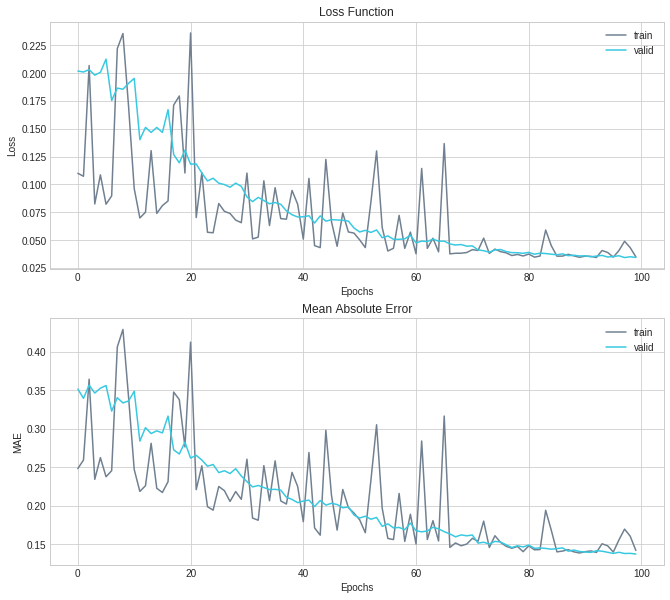

<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MLP; 
Numeric Features; 
Average Math Proficiency
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
EV score. Train:  0.8472425188546951
EV score. Valid:  0.8247326800412723
EV score. Test:  0.7871343547297065
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
R2 score. Train:  0.8336660080126947
R2 score. Valid:  0.8223260758481671
R2 score. Test:  0.7724399263893735
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MSE score. Train:  0.03625210294605154
MSE score. Valid:  0.03426533370566814
MSE score. Test:  0.052286151648698556
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MAE score. Train:  0.14025573832056476
MAE score. Valid:  0.13940282263467946
MAE score. Test:  0.16878977127373218
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MdAE score. Train:  0.10320278167724606
MdAE score. Valid:  0.11229005813598647
MdAE score. Test:  0.1219710063934325


In [14]:
history_plot(history,100)
mlp_model1.load_weights(fw)
y_train_mlp1=mlp_model1.predict(X_train1)
y_valid_mlp1=mlp_model1.predict(X_valid1)
y_test_mlp1=mlp_model1.predict(X_test1)
ti='MLP; \nNumeric Features; \n'+\
   'Average Math Proficiency'
scores(ti,y_train1,y_valid1,y_test1,
       y_train_mlp1,y_valid_mlp1,y_test_mlp1)

In [15]:
mlp_model2=mlp_model()
checkpointer=tkc.ModelCheckpoint(
    filepath=fw,verbose=2,save_best_only=True)
lr_reduction=tkc.ReduceLROnPlateau(
    monitor='val_loss',patience=5,
    verbose=2,factor=.75)
history=mlp_model2.fit(
    X_train2,y_train2, 
    epochs=200,batch_size=16,verbose=2,
    validation_data=(X_valid2,y_valid2),
    callbacks=[checkpointer,lr_reduction])

Train on 1017 samples, validate on 127 samples
Epoch 1/200
 - 5s - loss: 560719638.0522 - mean_absolute_error: 3875.1373 - val_loss: 7828.6381 - val_mean_absolute_error: 81.6545

Epoch 00001: val_loss improved from inf to 7828.63806, saving model to weights.passnyc.hdf5
Epoch 2/200
 - 5s - loss: 11753.3958 - mean_absolute_error: 65.1513 - val_loss: 18265.5716 - val_mean_absolute_error: 124.7364

Epoch 00002: val_loss did not improve
Epoch 3/200
 - 4s - loss: 189354.5685 - mean_absolute_error: 163.2658 - val_loss: 1.8041 - val_mean_absolute_error: 1.2771

Epoch 00003: val_loss improved from 7828.63806 to 1.80410, saving model to weights.passnyc.hdf5
Epoch 4/200
 - 4s - loss: 6599.0094 - mean_absolute_error: 37.2348 - val_loss: 15882.5542 - val_mean_absolute_error: 116.1486

Epoch 00004: val_loss did not improve
Epoch 5/200
 - 4s - loss: 197777.2082 - mean_absolute_error: 125.8741 - val_loss: 29817.7468 - val_mean_absolute_error: 158.8396

Epoch 00005: val_loss did not improve
Epoch 6/20

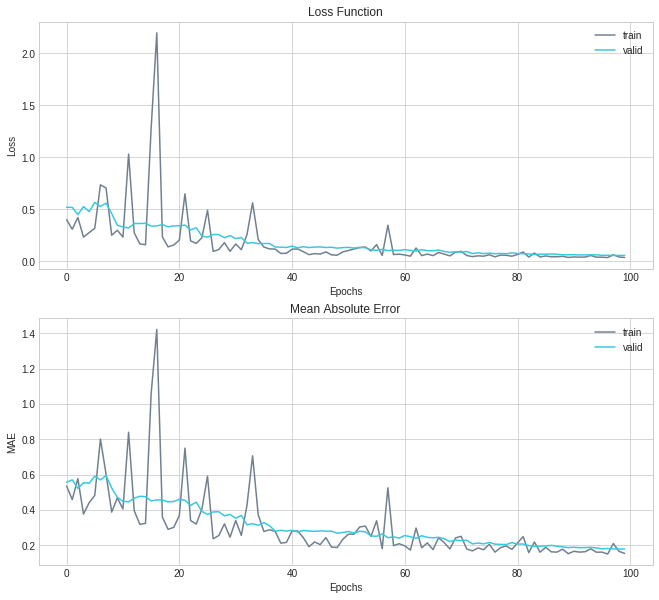

<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MLP; 
Numeric Features; 
Average ELA Proficiency
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
EV score. Train:  0.5957456998897407
EV score. Valid:  0.711471946083571
EV score. Test:  0.542326594909608
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
R2 score. Train:  0.5943545093682444
R2 score. Valid:  0.7110939294111109
R2 score. Test:  0.541327443732552
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MSE score. Train:  0.051007512513599966
MSE score. Valid:  0.036177064810302695
MSE score. Test:  0.0736412667683565
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MAE score. Train:  0.16902035741952945
MAE score. Valid:  0.15050702202664276
MAE score. Test:  0.19605349645018577
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MdAE score. Train:  0.1320958900451661
MdAE score. Valid:  0.12091144561767564
MdAE score. Test:  0.14608058929443368


In [16]:
history_plot(history,100)
mlp_model2.load_weights(fw)
y_train_mlp2=mlp_model2.predict(X_train2)
y_valid_mlp2=mlp_model2.predict(X_valid2)
y_test_mlp2=mlp_model2.predict(X_test2)
ti='MLP; \nNumeric Features; '+\
   '\nAverage ELA Proficiency'
scores(ti,y_train2,y_valid2,y_test2,
       y_train_mlp2,y_valid_mlp2,y_test_mlp2)

### MLP => Numeric & categorical features

In [17]:
def cmlp_model():
    model=Sequential()    
    model.add(tkl.Dense(149,input_dim=149))
    model.add(tkl.LeakyReLU(alpha=.02))
    model.add(tkl.Dense(149*4))
    model.add(tkl.LeakyReLU(alpha=.02))    
    model.add(tkl.Dense(149*16))
    model.add(tkl.LeakyReLU(alpha=.02))
    model.add(tkl.Dense(1))    
    model.compile(loss='mse',optimizer='rmsprop',
                  metrics=['mae'])
    return model
mlp_model3=cmlp_model()

In [18]:
checkpointer=tkc.ModelCheckpoint(
    filepath=fw,verbose=2,save_best_only=True)
lr_reduction=tkc.ReduceLROnPlateau(
    monitor='val_loss',patience=5,
    verbose=2,factor=.75)
history=mlp_model3.fit(
    X_train3,y_train3, 
    epochs=200,batch_size=16,verbose=2,
    validation_data=(X_valid3,y_valid3),
    callbacks=[checkpointer,lr_reduction])

Train on 1017 samples, validate on 127 samples
Epoch 1/200
 - 2s - loss: 41817745.5237 - mean_absolute_error: 1279.4861 - val_loss: 878803.9469 - val_mean_absolute_error: 863.4763

Epoch 00001: val_loss improved from inf to 878803.94685, saving model to weights.passnyc.hdf5
Epoch 2/200
 - 1s - loss: 696898.2682 - mean_absolute_error: 368.7648 - val_loss: 299706.0661 - val_mean_absolute_error: 504.4097

Epoch 00002: val_loss improved from 878803.94685 to 299706.06607, saving model to weights.passnyc.hdf5
Epoch 3/200
 - 1s - loss: 185697.6624 - mean_absolute_error: 169.1745 - val_loss: 12181.6469 - val_mean_absolute_error: 101.3360

Epoch 00003: val_loss improved from 299706.06607 to 12181.64692, saving model to weights.passnyc.hdf5
Epoch 4/200
 - 1s - loss: 141366.0433 - mean_absolute_error: 109.0198 - val_loss: 1374.6800 - val_mean_absolute_error: 33.9893

Epoch 00004: val_loss improved from 12181.64692 to 1374.67999, saving model to weights.passnyc.hdf5
Epoch 5/200
 - 1s - loss: 25902

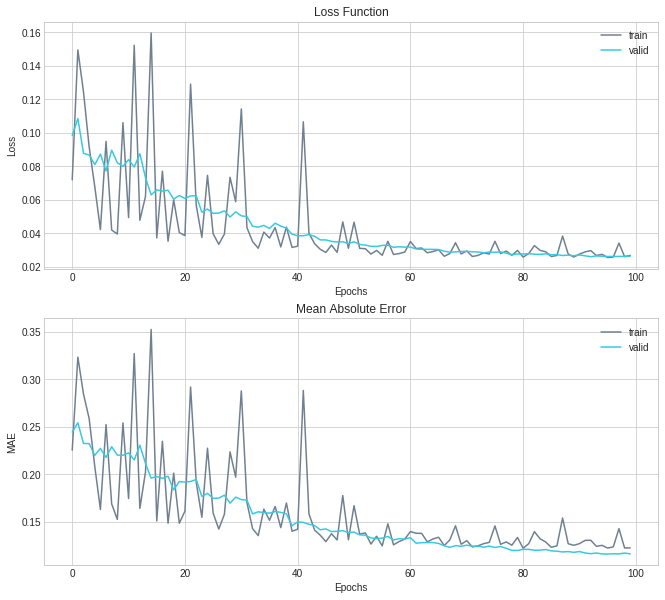

<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MLP; 
Numeric & Categorical Features; 
Average Math Proficiency
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
EV score. Train:  0.8828038417210048
EV score. Valid:  0.8676754899912376
EV score. Test:  0.8552075896169312
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
R2 score. Train:  0.8801085083523371
R2 score. Valid:  0.8676290987250257
R2 score. Test:  0.8503928381462459
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MSE score. Train:  0.026130069059476835
MSE score. Valid:  0.025528411818219278
MSE score. Test:  0.03437502294801286
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MAE score. Train:  0.11592962741226652
MAE score. Valid:  0.12225428638808683
MAE score. Test:  0.13642640523612498
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MdAE score. Train:  0.08471663475036628
MdAE score. Valid:  0.10519612312316884
MdAE score. Test:  0.102678065299987

In [19]:
history_plot(history,100)
mlp_model3.load_weights(fw)
y_train_mlp3=mlp_model3.predict(X_train3)
y_valid_mlp3=mlp_model3.predict(X_valid3)
y_test_mlp3=mlp_model3.predict(X_test3)
ti='MLP; \nNumeric & Categorical Features; '+\
   '\nAverage Math Proficiency'
scores(ti,y_train3,y_valid3,y_test3,
       y_train_mlp3,y_valid_mlp3,y_test_mlp3)

In [20]:
mlp_model4=cmlp_model()
checkpointer=tkc.ModelCheckpoint(
    filepath=fw,verbose=2,save_best_only=True)
lr_reduction=tkc.ReduceLROnPlateau(
    monitor='val_loss',patience=5,
    verbose=2,factor=.75)
history=mlp_model4.fit(
    X_train4,y_train4, 
    epochs=200,batch_size=16,verbose=2,
    validation_data=(X_valid4,y_valid4),
    callbacks=[checkpointer,lr_reduction])

Train on 1017 samples, validate on 127 samples
Epoch 1/200
 - 2s - loss: 27198086.1132 - mean_absolute_error: 1134.8168 - val_loss: 64.2479 - val_mean_absolute_error: 7.0265

Epoch 00001: val_loss improved from inf to 64.24793, saving model to weights.passnyc.hdf5
Epoch 2/200
 - 1s - loss: 456051.1518 - mean_absolute_error: 248.9584 - val_loss: 388.7205 - val_mean_absolute_error: 18.6309

Epoch 00002: val_loss did not improve
Epoch 3/200
 - 1s - loss: 55858.3259 - mean_absolute_error: 92.3781 - val_loss: 132492.4574 - val_mean_absolute_error: 335.1404

Epoch 00003: val_loss did not improve
Epoch 4/200
 - 1s - loss: 72039.4489 - mean_absolute_error: 117.9614 - val_loss: 4.5026 - val_mean_absolute_error: 2.0062

Epoch 00004: val_loss improved from 64.24793 to 4.50265, saving model to weights.passnyc.hdf5
Epoch 5/200
 - 1s - loss: 710.6435 - mean_absolute_error: 11.4408 - val_loss: 2.3884 - val_mean_absolute_error: 1.1049

Epoch 00005: val_loss improved from 4.50265 to 2.38840, saving mod

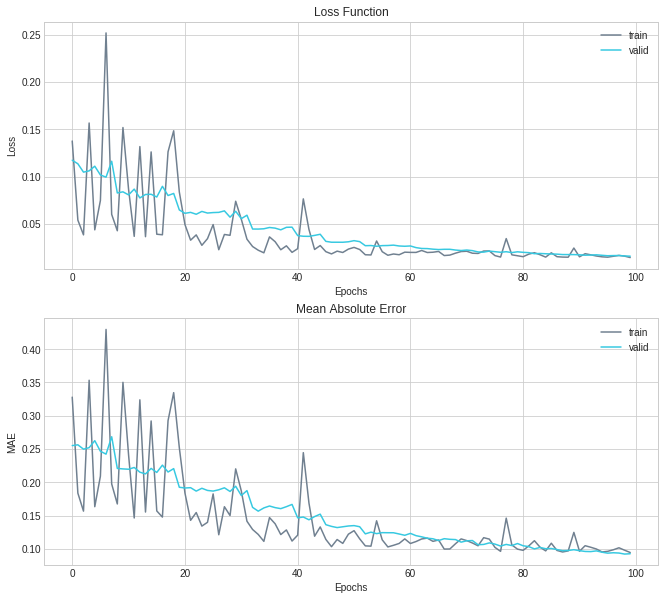

<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MLP; 
Numeric & Categorical Features; 
Average ELA Proficiency
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
EV score. Train:  0.8788048859363191
EV score. Valid:  0.8838599367382594
EV score. Test:  0.783214556806596
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
R2 score. Train:  0.8768764619372714
R2 score. Valid:  0.883729096147049
R2 score. Test:  0.7831258453018328
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MSE score. Train:  0.015482054043476372
MSE score. Valid:  0.014559541845786514
MSE score. Test:  0.034819801758483815
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MAE score. Train:  0.08981465939184517
MAE score. Valid:  0.09443175160665836
MAE score. Test:  0.12810228664427994
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MdAE score. Train:  0.06741213798522949
MdAE score. Valid:  0.07748677253723146
MdAE score. Test:  0.09326900005340577

In [21]:
history_plot(history,100)
mlp_model4.load_weights(fw)
y_train_mlp4=mlp_model4.predict(X_train4)
y_valid_mlp4=mlp_model4.predict(X_valid4)
y_test_mlp4=mlp_model4.predict(X_test4)
ti='MLP; \nNumeric & Categorical Features; '+\
   '\nAverage ELA Proficiency'
scores(ti,y_train4,y_valid4,y_test4,
       y_train_mlp4,y_valid_mlp4,y_test_mlp4)

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Predictions & Real Data</h1>

### Numeric features

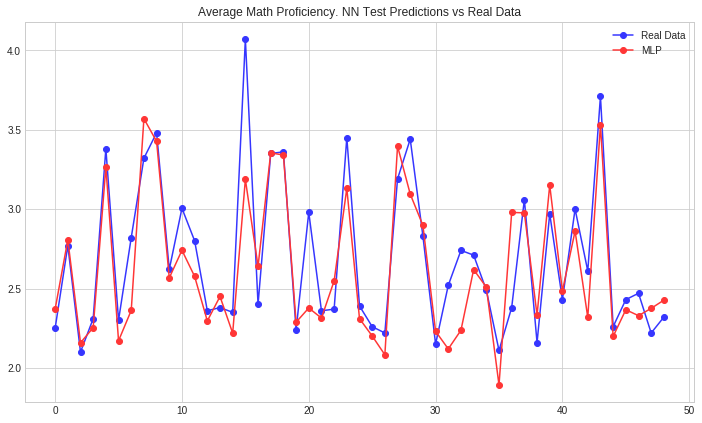

In [22]:
plt.figure(figsize=(12,7))
plt.plot(y_test1[1:50],'-o',
         color='#3636ff',label='Real Data')
plt.plot(y_test_mlp1[1:50],'-o',
         color='#ff3636',label='MLP')
ti="Average Math Proficiency. "+\
   "NN Test Predictions vs Real Data"
plt.legend(); plt.title(ti);

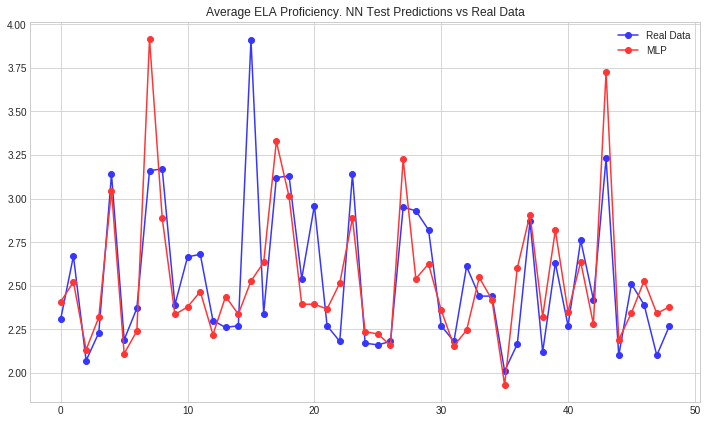

In [23]:
plt.figure(figsize=(12,7))
plt.plot(y_test2[1:50],'-o',
         color='#3636ff',label='Real Data')
plt.plot(y_test_mlp2[1:50],'-o',
         color='#ff3636',label='MLP')
ti="Average ELA Proficiency. "+\
   "NN Test Predictions vs Real Data"
plt.legend(); plt.title(ti);

### Numeric & categorical features

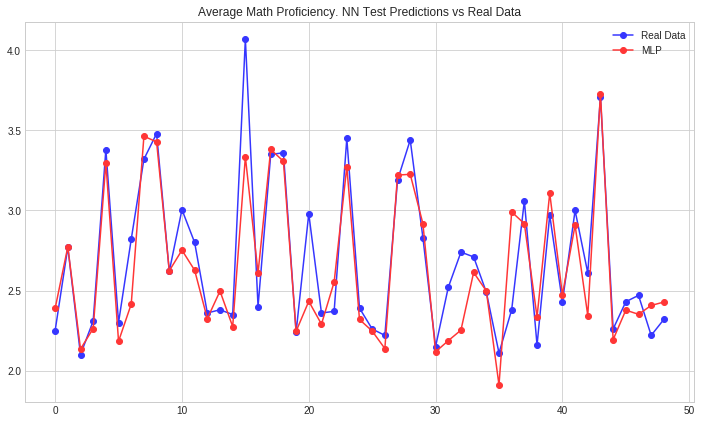

In [24]:
plt.figure(figsize=(12,7))
plt.plot(y_test3[1:50],'-o',
         color='#3636ff',label='Real Data')
plt.plot(y_test_mlp3[1:50],'-o',
         color='#ff3636',label='MLP')
ti="Average Math Proficiency. "+\
   "NN Test Predictions vs Real Data"
plt.legend(); plt.title(ti);

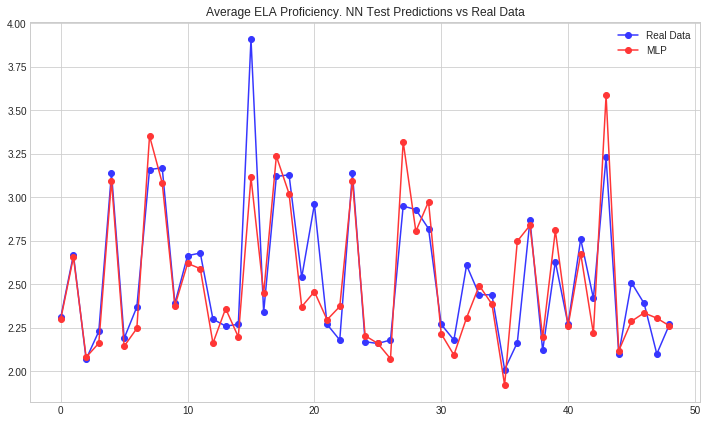

In [25]:
plt.figure(figsize=(12,7))
plt.plot(y_test4[1:50],'-o',
         color='#3636ff',label='Real Data')
plt.plot(y_test_mlp4[1:50],'-o',
         color='#ff3636',label='MLP')
ti="Average ELA Proficiency. "+\
   "NN Test Predictions vs Real Data"
plt.legend(); plt.title(ti);

In this case, neural networks were used to predict the indicators of educational outcomes. 

It is difficult to achieve high accuracy here in general since the ultimate goal depends not only on the financing, social environment and professionalism of the staff but also on the personal qualities of the students. 

Adding category variables does not improve the accuracy of predictions because these indicators depend not exactly on geolocations but on the well-being of the surrounding area.

I believe that it is possible to reach at least the same accuracy with neural networks as with regression algorithms like `Gradient Boosting` or `Random Forest`.

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'>&#x1F310; &nbsp; Let's Go Ahead</h1>
It's time to move to the next step.

&#x1F4D8; &nbsp; [PASSNYC. 32 School Districts and D5. Part 2](https://www.kaggle.com/olgabelitskaya/passnyc-32-school-districts-and-d5-part-2)